In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

### Reading dataset:

In [17]:
# Reading the dataset
df = pd.read_csv('Battery_RUL.csv')

### Random Forest Regression:

In [18]:
#  Preprocessing
X = df.drop("RUL", axis=1).drop("Cycle_Index", axis=1)
y = df["RUL"]

## Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train the model
model = RandomForestRegressor(n_estimators=100, oob_score=True)
model.fit(X_train, y_train)
# Make predictions
predictions = model.predict(X_test)


# Evaluate the model
oob_score = model.oob_score_
r2 = r2_score(y_test, predictions)

print('Model Evaluation:')
print(f'Out-of-Bag Score: {oob_score * 100:.2f}%')
print(f'R2 Score: {r2 * 100:.2f}%')
print()


Model Evaluation:
Out-of-Bag Score: 99.41%
R2 Score: 99.64%



### Feature Ranking

In [19]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature Ranking:")
for feature in range(X.shape[1]):
    print("%d. feature %d (%f)" % (feature + 1, indices[feature], importances[indices[feature]]))


Feature Ranking:
1. feature 0 (0.854307)
2. feature 1 (0.083191)
3. feature 4 (0.023856)
4. feature 2 (0.016715)
5. feature 5 (0.009591)
6. feature 3 (0.007037)
7. feature 6 (0.005303)


### Visualizing Predictions VS Actual Values:

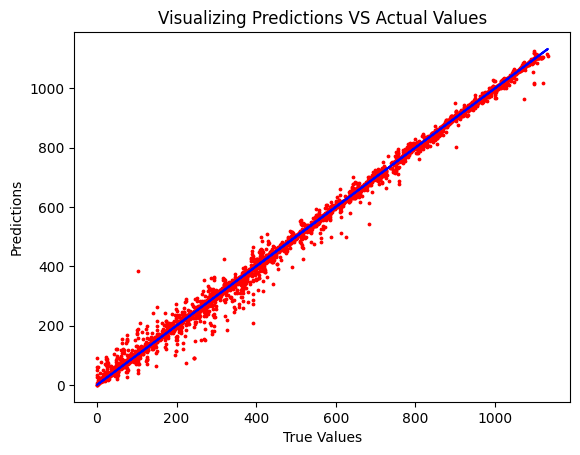

In [20]:
plt.plot(y_test, y_test, color='blue')
plt.scatter(y_test, predictions, s=3, color='red')
plt.title("Visualizing Predictions VS Actual Values")
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

### Visualizing Error Distribution:

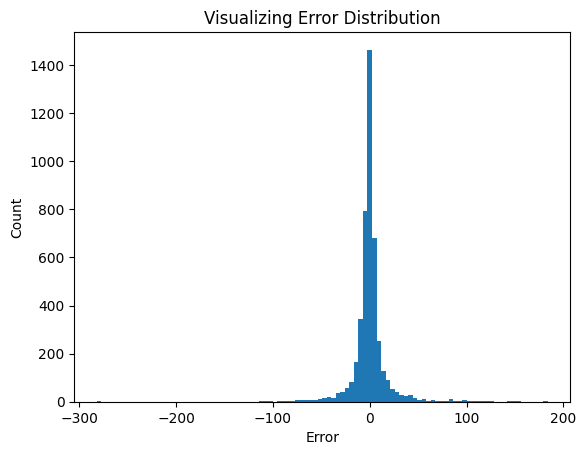

In [21]:
errors = y_test - predictions
plt.hist(errors, bins=100)
plt.title("Visualizing Error Distribution")
plt.xlabel('Error')
plt.ylabel('Count')
plt.show()
